In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
data_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:

pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

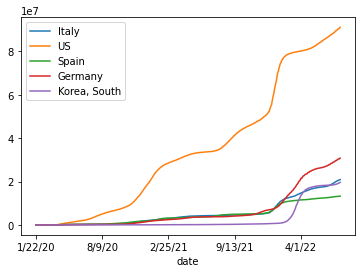

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] 
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('new_COVID_small_flat_table.csv',sep=';',index=False)

In [16]:
data_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,no,Albania,0,0,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,no,Algeria,0,0,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,no,Andorra,0,0,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,no,Angola,0,0,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [20]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [23]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

In [24]:
pd_relational_model.to_csv('new_COVID_relational_confirmed.csv',sep=';',index=False)

In [25]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
260760 2022-07-24    no      US   90410055
261045 2022-07-25    no      US   90598955
261330 2022-07-26    no      US   90733680
261615 2022-07-27    no      US   90972856
261900 2022-07-28    no      US   91120218
